<a href="https://colab.research.google.com/github/natpol567/Zadania/blob/main/Interpolacja_sgn(sin(8x)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jądro h1:


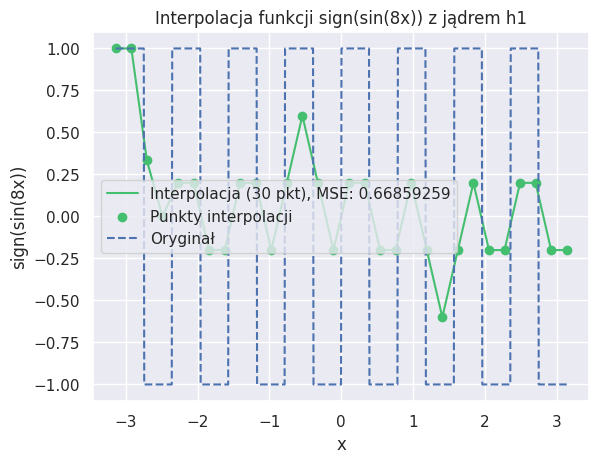

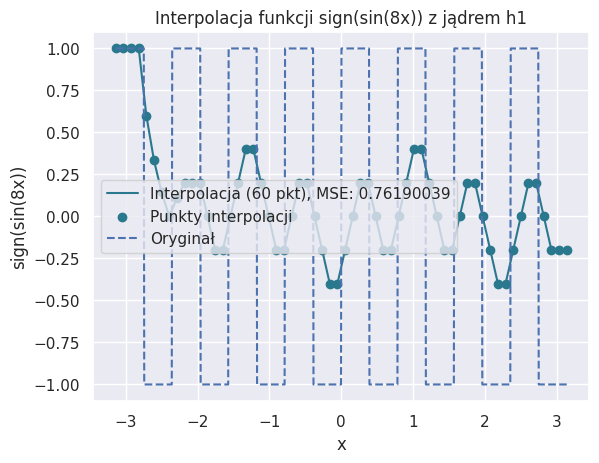

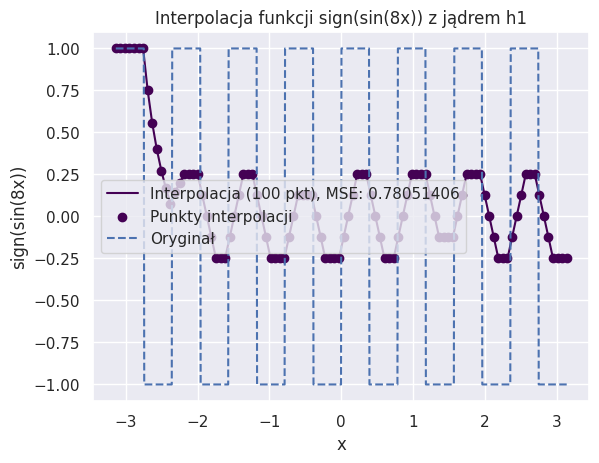

Jądro h2:


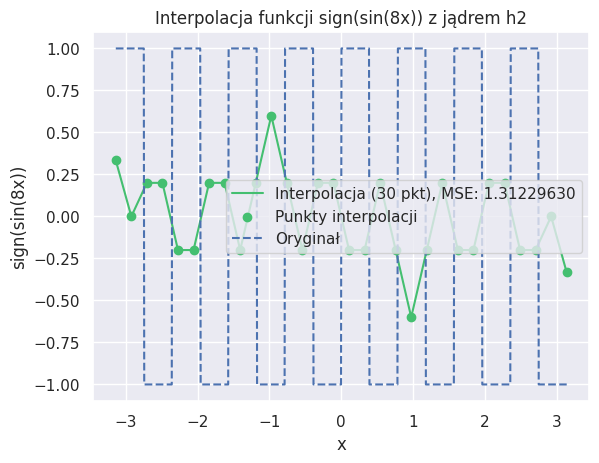

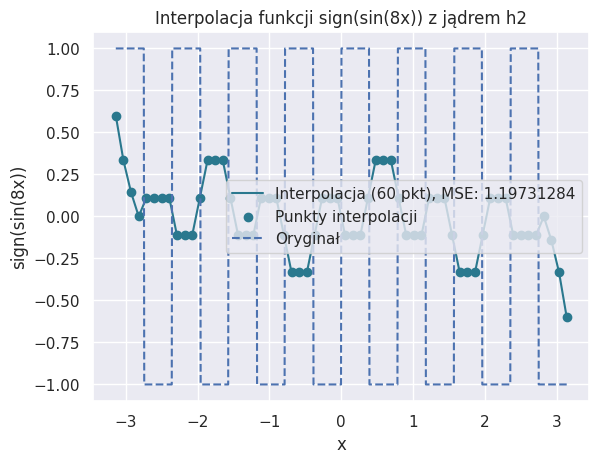

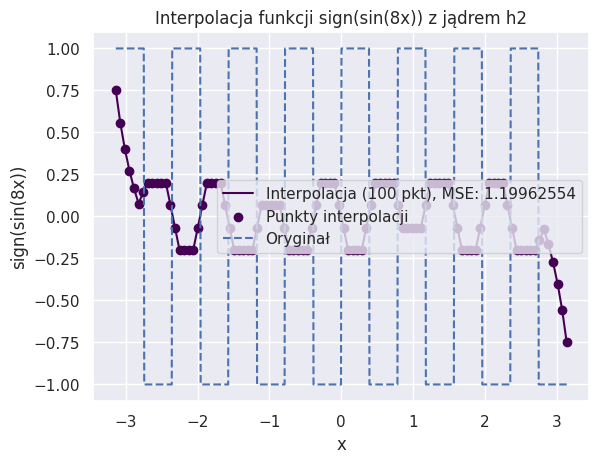

Jądro h3:


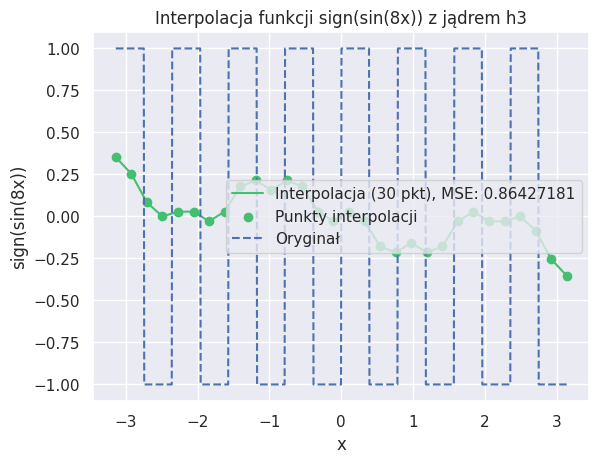

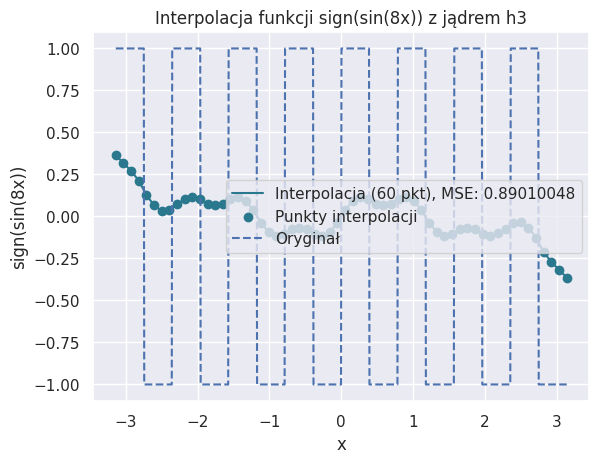

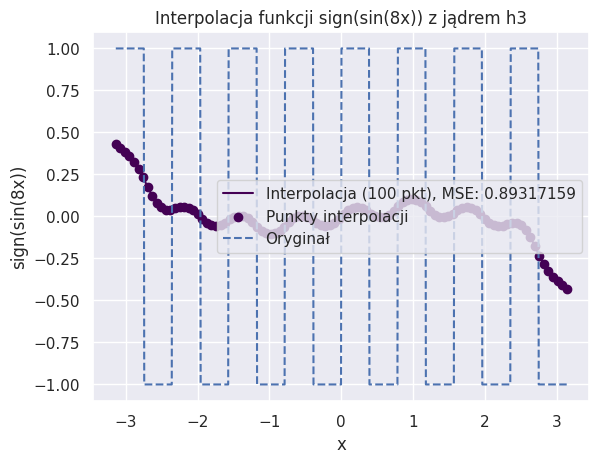

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

# Funkcja do interpolacji
def f(x):
    return np.sign(np.sin(8 * x))


# Funkcje jądrowe
def h1(t):
    return np.where((t >= 0) & (t < 1), 1, 0)

def h2(t):
    return np.where((t >= -1/2) & (t <= 1/2), 1, 0)

def h3(t):
    return np.where((t >= -1) & (t <= 1), 1 - np.abs(t), 0)


# Wybór jąder do konwolucji
kernels = [h1, h2, h3]

# Wybór liczby punktów
n_points_list = [30, 60, 100]

# Interpolacja funkcji za pomocą jedno-wymiarowej konwolucji
def interpolate_sign_function(kernel, n_points):
    x_original = np.linspace(-np.pi, np.pi, 1000)
    y_original = f(x_original)

    x_interpolated = np.linspace(-np.pi, np.pi, n_points)
    t = np.linspace(-np.pi, np.pi, n_points)
    y_interpolated = np.zeros_like(x_interpolated)

    for i, x in enumerate(x_interpolated):
        y_interpolated[i] = np.sum(f(t) * kernel(x - t)) / np.sum(kernel(x - t))

    mse = metrics.mean_squared_error(f(x_interpolated), y_interpolated)
    return x_interpolated, y_interpolated, mse

# Początkowe wartości x_original i y_original
x_original = np.linspace(-np.pi, np.pi, 1000)
y_original = f(x_original)

# Interpolacja i obliczenie MSE
for kernel in kernels:
    print(f"Jądro {kernel.__name__}:")

    for n_points in n_points_list:
        x_interpolated, y_interpolated, mse = interpolate_sign_function(kernel, n_points)

        color = plt.cm.viridis(1 - n_points / max(n_points_list))
        plt.plot(x_interpolated, y_interpolated, label=f"Interpolacja ({n_points} pkt), MSE: {mse:.8f}", color=color)
        plt.scatter(x_interpolated, y_interpolated, color=color, marker='o', label='Punkty interpolacji')
        plt.plot(x_original, y_original, label="Oryginał", linestyle='dashed')
        plt.title(f"Interpolacja funkcji sign(sin(8x)) z jądrem {kernel.__name__}")
        plt.xlabel('x')
        plt.ylabel('sign(sin(8x))')
        plt.legend()
        plt.show()